# Supervised Machine Learning

**Supervised Learning** is a type of machine learning where an algorithm is trained on a **labeled dataset**, consisting of input-output pairs. The algorithm learns the mapping between input data and corresponding output labels, allowing it to make predictions on decisions when given new, unseen input.

## 1. Linear Regression

The ultimate goal of linear regression is to **find a line that best fits the data**.

  ###    i. Simple Linear Regression

If a single independent variable is used to predict the value of a numerical dependent variable then such a linear regression algorithm is called **Simple Linear Regression.**

In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [187]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
#code to ignore the future warnings

In [188]:
import warnings
warnings.filterwarnings("ignore")   #To avoid the warnings

**Scikit Learn** is the most popular machine learning package for python and has a lot of algorithms built-in.

In [189]:
info={"Age":[25,30,35,40,45],"Premium":[18000,32000,40000,47000,55000]}

In [190]:
info

{'Age': [25, 30, 35, 40, 45], 'Premium': [18000, 32000, 40000, 47000, 55000]}

In [191]:
df=pd.DataFrame(info)

In [192]:
df

,Age,Premium
0,25,18000
1,30,32000
2,35,40000
3,40,47000
4,45,55000


In [193]:
X = np.array(df["Age"]).reshape(-1, 1)
y = np.array(df["Premium"])

In [194]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [195]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [196]:
predictions = model.predict(X)

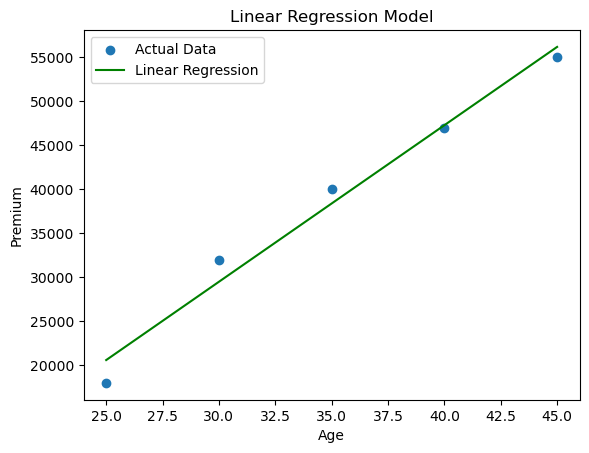

In [197]:
plt.scatter(X, y, label="Actual Data")
plt.plot(X, predictions, color='green', label="Linear Regression")
plt.xlabel("Age")
plt.ylabel("Premium")
plt.title("Linear Regression Model")
plt.legend()
plt.show()

In [198]:
reg.fit(df[["Age"]],df["Premium"])
#here,fit means we gonna train the regression model using the data points we have.#3#
#"Age" is the independent variable
#"Premium" is the dependent variable

LinearRegression()

### Predicting the unseen data in dataset

### Finding the premium for the age 21 (new data/unseen data)

In [199]:
reg.predict([[21]])  #finding the premium for the age 21

array([13480.])

### Finding the premium for the age 50 (new data/unseen data)

In [200]:
reg.predict([[50]]) #finding the premium for the age 50

array([65100.])

In [201]:
reg.coef_   #slope

array([1780.])

In [202]:
reg.intercept_   #line interseted on y_axis

-23900.0

### Validating our Model

### y=mx+c

In [203]:
1780*21+(-23900)   #predicting the premium amount for age 21

13480

In [204]:
1780*50+(-23900)  #predicting the premium amount for age 50

65100

### ii. Multiple Linear Regression

If more than one independent variable is used to predict the value of numerical dependent variable, then such a linear regression algorithm is called **multiple linear regression.**

In [205]:
data={"Age":[25,30,35,40,45],"Height":[162.56,172.72,167.64,165.10,157.48],"Weight":[70,95,78,110,85],"Premium":[18000,38000,38000,60000,70000]}

In [206]:
df=pd.DataFrame(data)

In [207]:
df

,Age,Height,Weight,Premium
0,25,162.56,70,18000
1,30,172.72,95,38000
2,35,167.64,78,38000
3,40,165.10,110,60000
4,45,157.48,85,70000


In [208]:
df.isna().sum() #to check the null values in the data

Age        0
Height     0
Weight     0
Premium    0
dtype: int64

In [209]:
reg=linear_model.LinearRegression()

In [210]:
reg.fit(df[["Age","Height","Weight"]],df["Premium"])

LinearRegression()

In [211]:
reg.coef_

array([2150.26052416, -248.45851574,  312.65291961])

In [212]:
reg.intercept_

-16827.013154824934

### Finding out the Premium whose Age 27, Height 167.56, Weight 60

In [213]:
reg.predict([[27,167.56,60]])

array([18357.48727691])

### Validating the model

### y=m1x1+m2x2+m3x3+c

In [214]:
2150.26052416*27+-248.45851574*167.56+312.65291961*60+-16827.013154824934

18357.487276700667

### Finding out the Premium whose Age 60, Height 165.10, Weight 80

In [215]:
reg.predict([[60,165.10,80]])

array([96180.35091498])

### Validating the model

### y=m1x1+m2x2+m3x3+c

In [216]:
2150.26052416*60+-248.45851574*165.10+312.65291961*80+-16827.013154824934

96180.35091490106

# 2. Logistic Regression

**Logistic Regression** is a machine learning algorithm based on supervised learning. It is used to describe data to explain the relationshib between one dapendent binary variable and one or more independent variables. Logistic Equation is created in such a way that the output of a probability value that can be mapped to classes and values can only be between 0 and 1
    
    1. Binary Classification
    2. Multiclass Classification

### 1. Binary Classification

In [217]:
df=pd.read_csv("insurance_data.csv")

In [218]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [219]:
#df["bought_insurance"].replace{"no":"0","yes":"1",inplace=True}   (converting the categorical data into binary format)

In [220]:
e = np.array(df["age"]).reshape(-1, 1)
f = np.array(df["bought_insurance"])

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
x_train,x_test,y_train,y_test=train_test_split(e,f,test_size=0.2,random_state=0)

In [223]:
len(x_train)

21

In [224]:
len(x_test)

6

In [225]:
x_test

array([[47],
       [50],
       [49],
       [58],
       [56],
       [28]], dtype=int64)

In [226]:
from sklearn.linear_model import LogisticRegression

In [227]:
lr=LogisticRegression()

In [228]:
lr.fit(x_train,y_train)

LogisticRegression()

In [229]:
lr.predict(x_test)

array([1, 1, 1, 1, 1, 0], dtype=int64)

In [230]:
y_predictionss=lr.predict(x_test)

In [231]:
lr.predict([[23]]) #"no":"0","yes":"1"  #the person age of 23 will not take the insurance

array([0], dtype=int64)

In [232]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmm = confusion_matrix(y_test, y_predictionss)
print ("Confusion Matrix:\n",cmm)

Confusion Matrix:
 [[1 0]
 [0 5]]


### 2. Multiclass Classification

In [233]:
df=pd.read_csv(r"C:\Users\ganig\OneDrive\Desktop\Dataset\iris_dataset.csv")

In [234]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [235]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [236]:
df.rename(columns={'target': 'species'}, inplace=True)

In [237]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [238]:
df["species"].replace({'Iris-setosa':"1", 'Iris-versicolor':"2", 'Iris-virginica':"3"},inplace=True)

In [239]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [240]:
from sklearn.model_selection import train_test_split

In [241]:
X_train, X_test, y_train, y_test=train_test_split(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]],df["species"],test_size=0.2)

In [242]:
len(X_train)

120

In [243]:
len(X_test)

30

In [244]:
from sklearn.linear_model import LogisticRegression

In [245]:
lr=LogisticRegression()

In [246]:
lr.fit(X_train,y_train)

LogisticRegression()

In [247]:
lr.predict(X_test)

array(['2', '1', '2', '1', '2', '2', '2', '3', '2', '3', '2', '1', '3',
       '2', '3', '2', '3', '2', '3', '2', '2', '1', '1', '1', '3', '2',
       '1', '2', '3', '3'], dtype=object)

### Predict the "species name" based on sepal length,sepal width,petal length,petal width in cm

In [248]:
lr.predict([[5.1,3.8,1.9,0.4]]) #belongs to Iris-setosa

array(['1'], dtype=object)

In [249]:
X_test   #'Iris-setosa':"1", 'Iris-versicolor':"2", 'Iris-virginica':"3"

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
62,6.0,2.2,4.0,1.0
17,5.1,3.5,1.4,0.3
96,5.7,2.9,4.2,1.3
11,4.8,3.4,1.6,0.2
53,5.5,2.3,4.0,1.3
90,5.5,2.6,4.4,1.2
99,5.7,2.8,4.1,1.3
133,6.3,2.8,5.1,1.5
95,5.7,3.0,4.2,1.2
146,6.3,2.5,5.0,1.9


## Score

In [250]:
print("Score:",lr.score(X_test,y_test))

Score: 0.9333333333333333


## Accuracy

In [345]:
y_pred=lr.predict(X_test)

In [346]:
y_pred

array(['2', '1', '2', '1', '2', '2', '2', '3', '2', '3', '2', '1', '3',
       '2', '3', '2', '3', '2', '3', '2', '2', '1', '1', '1', '3', '2',
       '1', '2', '3', '3'], dtype=object)

In [252]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9333333333333333


# 3. Support Vector Machine

**Support Vector Machine** is a machine learning algorithm based on supervised learning , that can be used for both regression and classification. In general we use for classification. SVM finds the **hyperplane** between classes of data which **maximizes the margin between classes**.

In [253]:
import pandas as pd

In [254]:
data=pd.read_csv(r"C:\Users\ganig\OneDrive\Desktop\Dataset\iris_dataset.csv")

In [255]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


From the above data **"target"** is the *dependent variable/target variable* and **"sepal length (cm)" "sepal width (cm)" "petal length (cm)" "petal width (cm)"** are *dependent variables*

In [256]:
c=data.iloc[:,:4]    #feature matrix

In [257]:
d=data.iloc[:,-1]    #dependent variable vector

In [258]:
c

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [259]:
d

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: target, Length: 150, dtype: object

### Data Splitting

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
X1_train, X2_test, y1_train, y2_test = train_test_split(c,d,test_size=0.2,random_state=0)

In [262]:
len(X2_test)

30

In [263]:
len(X1_train)

120

In [264]:
len(y2_test)

30

In [265]:
len(y1_train)

120

In [266]:
from sklearn.svm import SVC #support vector classification

In [267]:
model=SVC(kernel="linear")

In [268]:
model.fit(X1_train,y1_train)

SVC(kernel='linear')

In [269]:
model.predict(X2_test)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [270]:
X2_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


## Score

In [271]:
model.score(X2_test,y2_test)

1.0

## Accuracy

In [272]:
y_predictions=model.predict(X2_test)

In [273]:
from sklearn.metrics import accuracy_score
accuracy_score(y2_test, y_predictions)

1.0

# 4. K-NN (K-Nearest Neighbourhood)

**KNN - K Nearest Neighbors** is one of the simplest *supervised machine learning* algorithm mostly used for **classification**. It classifies a data point based on how its neighbors are classified. KNN Algorithm is based on *feature similarity*. Choosing the right value of *k* is a process called **parameter tuning** and it is important for better accuracy.

**To choose a value of k:**
square root of n(the total number of data points). *Odd value* of k is selected to avoid confusion between two classes of data.

**To choose a neighbour:**
To find the nearest neighbors, we will calculate **Euclidean distance**.

In [274]:
DataFrame=pd.read_csv(r"C:\Users\ganig\OneDrive\Desktop\Dataset\diabetes.csv")

In [275]:
DataFrame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Objective:** Predict whether a person will be diagnosed with diabetes or not.

In [276]:
import pandas as pd
import numpy as np

In [277]:
len(DataFrame)

768

In [278]:
DataFrame.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [279]:
DataFrame.isna().sum()   #To find the null values in the DataFrame

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [280]:
# Replace zeroes
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [281]:
for column in zero_not_accepted:
    DataFrame[column] = DataFrame[column].replace(0, np.NaN)
    mean = int(DataFrame[column].mean(skipna=True))
    DataFrame[column] = DataFrame[column].replace(np.NaN, mean)

In [282]:
#Data Split
ind = DataFrame.iloc[:, 0:8]  #independent
dep = DataFrame.iloc[:, 8]    #dependent Variable
from sklearn.model_selection import train_test_split
a1_train, a2_test, b1_train, b2_test = train_test_split(ind, dep, random_state=0, test_size=0.2) #20% test data

In [283]:
a2_test.count()   #test_data

Pregnancies                 154
Glucose                     154
BloodPressure               154
SkinThickness               154
Insulin                     154
BMI                         154
DiabetesPedigreeFunction    154
Age                         154
dtype: int64

In [284]:
a1_train.count()   #train_data

Pregnancies                 614
Glucose                     614
BloodPressure               614
SkinThickness               614
Insulin                     614
BMI                         614
DiabetesPedigreeFunction    614
Age                         614
dtype: int64

In [285]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_a = StandardScaler()
a1_train = sc_a.fit_transform(a1_train)
a2_test = sc_a.transform(a2_test)

In [286]:
import math
#finding the total number of neighbors "k"
math.sqrt(len(b2_test))
#Note: K value should be odd number 

12.409673645990857

In [287]:
# Define the model: K-NN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')
#n_neighbors=11: This specifies the number of neighbors to consider when making predictions

# Training the Model
classifier.fit(a1_train, b1_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [288]:
y_predict = classifier.predict(a2_test)
print(y_predict)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]


In [289]:
# Evaluate Model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(b2_test, y_predict)
print ("Confusion Matrix:\n",cm)    
#\n is for New Line
#sns.heatmap(cm,annot=True)

Confusion Matrix:
 [[94 13]
 [15 32]]


In [290]:
from sklearn.metrics import f1_score
print("Score:",f1_score(b2_test, y_predict))

Score: 0.6956521739130436


In [291]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(b2_test, y_predict))

Accuracy: 0.8181818181818182


In [292]:
from sklearn.metrics import accuracy_score,mean_squared_error
print("Mean Square Error:",mean_squared_error(b2_test,y_predict))

Mean Square Error: 0.18181818181818182


In [293]:
from sklearn.metrics import classification_report
print(classification_report(b2_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



# Unsupervised Machine Learning

**Unsupervised Machine Learning** involves *extracting patterns or relationships from data without labeled outcomes* or explicit guidance, allowing the algorithm to identify inherent structures autonomously.

**Clustering** is a machine learning technique that involves grouping similar data points into clusters or subgroups *based on the similarity of their features*. The goal of clustering is to identify natural patterns or structures within the data, without any prior knowledge of the underlying categories or labels. 

# 5. Kmeans Clustering

**Kmeans** is a clustering algorithm used in machine learning to group data points into k distinct clusters based on their similarities, with the goal of **minimizing the variance**(spread or dispersion of set of values) within each cluster.

In [294]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [295]:
dt=pd.read_csv(r"C:\Users\ganig\OneDrive\Desktop\Dataset\income.csv")

In [296]:
dt.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


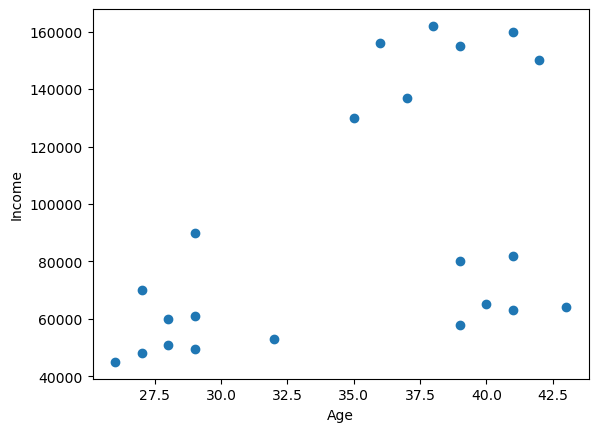

In [297]:
plt.scatter(x="Age",y="Income($)",data=dt)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [298]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [299]:
y_prediction=km.fit_predict(dt[["Age","Income($)"]])
y_prediction

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [300]:
dt["Cluster"]=y_prediction  #Adding a custer column to dataframe to represent it visually

In [301]:
dt.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [302]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

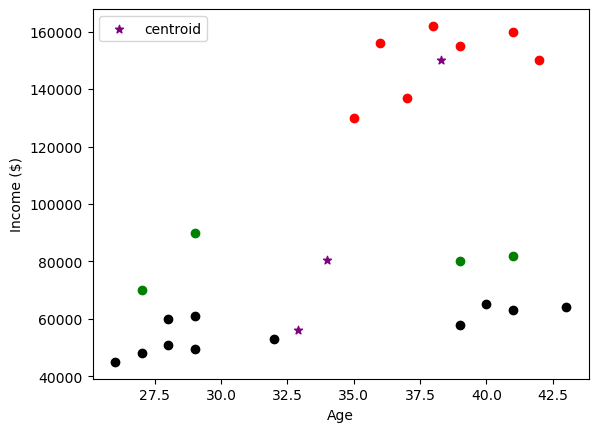

In [303]:
df1 = dt[dt.Cluster==0]
df2 = dt[dt.Cluster==1]
df3 = dt[dt.Cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

In [304]:
scaler = MinMaxScaler()
scaler.fit(dt[['Income($)']])
dt['Income($)'] = scaler.transform(dt[['Income($)']])
scaler.fit(dt[['Age']])
dt['Age'] = scaler.transform(dt[['Age']])

In [305]:
dt.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [306]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [307]:
y_prediction=km.fit_predict(dt[["Age","Income($)"]])
y_prediction

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [308]:
dt["Cluster"]=y_prediction

In [309]:
dt.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [310]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

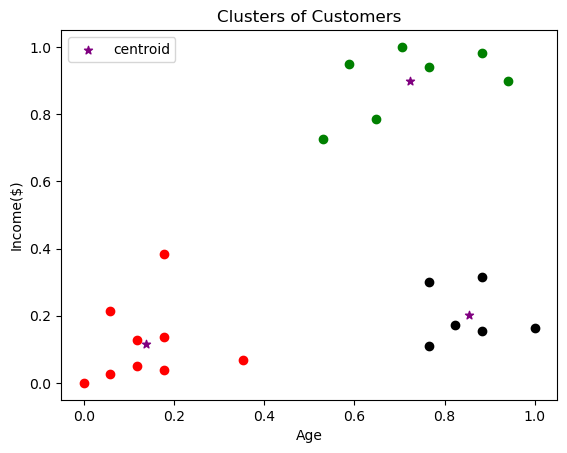

In [311]:
df1 = dt[dt.Cluster==0]
df2 = dt[dt.Cluster==1]
df3 = dt[dt.Cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

### Elbow Plot

In [312]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dt[['Age','Income($)']])
    sse.append(km.inertia_)

In [313]:
print("Sum of Squared Errors:\n",sse)
#Note: As K value increases sse(sum of squared errors) decreases

Sum of Squared Errors:
 [5.434011511988178, 2.0911363886990775, 0.4750783498553096, 0.34910470944195654, 0.27669362763002786, 0.21055478995472493, 0.17299621932455467, 0.13717729016208896, 0.10663983840905437]


In [314]:
k_rng

range(1, 10)

The **"elbow"** of the curve is often a good indicator of the optimal number of clusters. Choose the value of k at the point where the SSE starts decreasing at a slower rate, forming an elbow-like shape in the plot.

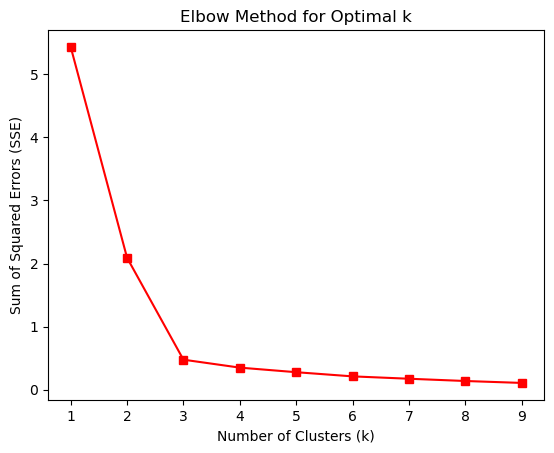

In [315]:
plt.plot(k_rng, sse, marker='s',color="red")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

**Note:** The elbow method shows that **3** is a good value for **K**

# Principal Component Analysis(PCA)/Dimensionality Reduction

**PCA** is a process of figuring out most important features or principal components that has the most impact on the target variable/dependent variable. PCA is called **dimensionality reduction technique** as it can help us reduce dimension, this is done to avoid the **curse of dimensionality**.

In [316]:
import pandas as pd
from sklearn.datasets import load_digits

In [317]:
Px=load_digits()
Px.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [318]:
Px.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [319]:
Px.data.shape    #total we have 64 features in this data

(1797, 64)

In [320]:
Px.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

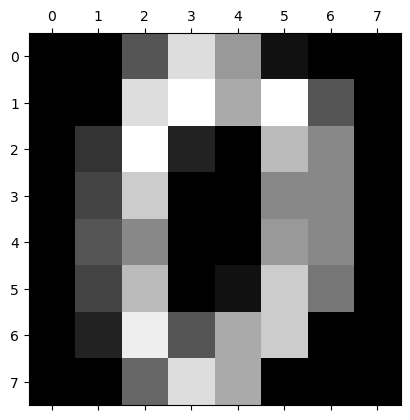

In [321]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.gray()
plt.matshow(Px.data[0].reshape(8,8))
plt.show()

<Figure size 640x480 with 0 Axes>

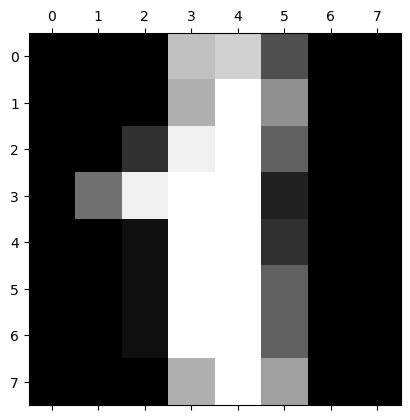

In [322]:
plt.gray()
plt.matshow(Px.data[1].reshape(8,8))
plt.show()

In [323]:
Px.target

array([0, 1, 2, ..., 8, 9, 8])

In [324]:
Px.target[1]

1

In [325]:
Pixel=pd.DataFrame(Px.data ,columns =Px.feature_names)
Pixel

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [326]:
Pixel.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [327]:
XPixel=Pixel
y=Px.target

In [328]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(XPixel)

In [329]:
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [330]:
from sklearn.model_selection import train_test_split
PX_train, PX_test, py_train, py_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

In [331]:
from sklearn.linear_model import LogisticRegression

PXmodel=LogisticRegression()
PXmodel.fit(PX_train,py_train)
PXmodel.score(PX_test,py_test)

0.9703703703703703

### Now, Lets Use PCA and find the accuracy of the model

In [332]:
Pixel.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [333]:
from sklearn.decomposition import PCA

pca=PCA(0.95)  #to capture 95% of feature variance
x_pca=pca.fit_transform(Pixel)
x_pca.shape

(1797, 29)

**Note:** Here, By using the PCA we reduced the features from **64 to 29**

In [334]:
x_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [335]:
pca.explained_variance_ratio_   #to print the no. of features we got using PCA

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [336]:
pca.n_components_   ##to print the no. of features we got using PCA

29

In [337]:
from sklearn.model_selection import train_test_split
XPCA_train, XPCA_test, py_train, py_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [338]:
from sklearn.linear_model import LogisticRegression

PXmodel=LogisticRegression(max_iter=1000)
PXmodel.fit(XPCA_train,py_train)
PXmodel.score(XPCA_test,py_test)

0.9611111111111111

By using PCA we can reduce the budget...

In [339]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(Pixel)
x_pca.shape

(1797, 2)

In [340]:
x_pca

array([[ -1.25946662,  21.27488908],
       [  7.95762161, -20.76868974],
       [  6.99191921,  -9.95599602],
       ...,
       [ 10.80127402,  -6.96025778],
       [ -4.87209175,  12.42396016],
       [ -0.34440838,   6.36553489]])

In [341]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [342]:
pca.n_components_

2

In [343]:
from sklearn.model_selection import train_test_split
XPCA_train, XPCA_test, py_train, py_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [344]:
from sklearn.linear_model import LogisticRegression

PXmodel=LogisticRegression(max_iter=1000)
PXmodel.fit(XPCA_train,py_train)
PXmodel.score(XPCA_test,py_test)

0.6472222222222223